In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.stats import linregress


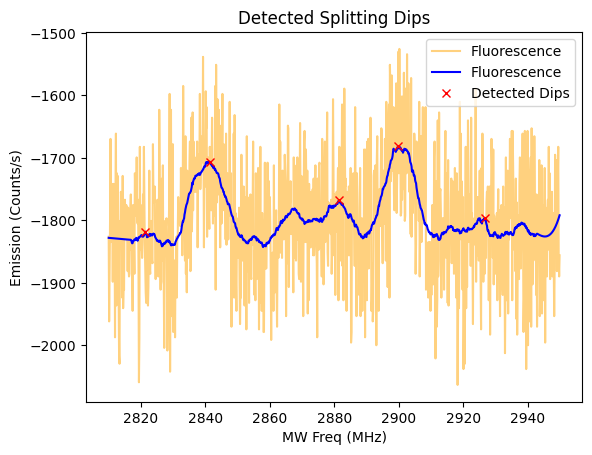

Two most prominent dip frequencies (MHz): [2841.43 2899.81]


In [ ]:

# 1. Read the Excel file
df = pd.read_excel("/Users/adampearl/Documents/191/GitHub/nv-center/Second_draft/code/Splitting/0.90.xlsx")

# 2. Extract columns for time (x-axis) and ratio (y-axis)
#    Make sure the column names match exactly what is in the file.
freq = df["MW Freq (MHz) - Fluorescence"]
fluorescence = df["Emission (Counts/s) - Fluorescence"]



# Invert the signal to detect dips
inv_fluorescence = -np.array(fluorescence)


smoothed_fluorescence = savgol_filter(inv_fluorescence, window_length=100, polyorder=3)

# Find peaks (which are dips in original data)
peaks, properties = find_peaks(smoothed_fluorescence, width=30)  # Tune `prominence` for sensitivity


# 6. Sort peaks by prominence and get the top 2
top_two_indices = np.argsort(smoothed_fluorescence[peaks])[-2:] # Indices in the 'peaks' array
top_two_peaks = peaks[top_two_indices]
top_two_freqs = freq[top_two_peaks]

# Plot the original data with identified dips
plt.plot(freq,inv_fluorescence, label="Fluorescence", alpha = 0.5, color = "orange")
plt.plot(freq,smoothed_fluorescence, label="Fluorescence", color = "b")
plt.plot(freq[peaks], smoothed_fluorescence[peaks], 'rx', label="Detected Dips")
plt.xlabel("MW Freq (MHz)")
plt.ylabel("Emission (Counts/s)")
plt.title("Detected Splitting Dips")
plt.legend()
plt.show()

# # Print peak positions
# print("Dip Frequencies (MHz):", freq[peaks])

# 8. Print frequencies
print("Two most prominent dip frequencies (MHz):", top_two_freqs.values)

In [86]:
def freq_peaks(file):
    # 1. Read the Excel file
    df = pd.read_excel(file)

    # 2. Extract columns for time (x-axis) and ratio (y-axis)
    #    Make sure the column names match exactly what is in the file.
    freq = df["MW Freq (MHz) - Fluorescence"]
    fluorescence = df["Emission (Counts/s) - Fluorescence"]



    # Invert the signal to detect dips
    inv_fluorescence = -np.array(fluorescence)


    smoothed_fluorescence = savgol_filter(inv_fluorescence, window_length=100, polyorder=3)

    # Find peaks (which are dips in original data)
    peaks, properties = find_peaks(smoothed_fluorescence, width=30)  # Tune `prominence` for sensitivity


    # 6. Sort peaks by prominence and get the top 2
    top_two_indices = np.argsort(smoothed_fluorescence[peaks])[-2:] # Indices in the 'peaks' array
    top_two_peaks = peaks[top_two_indices]
    top_two_freqs = freq[top_two_peaks]

    return top_two_freqs.values


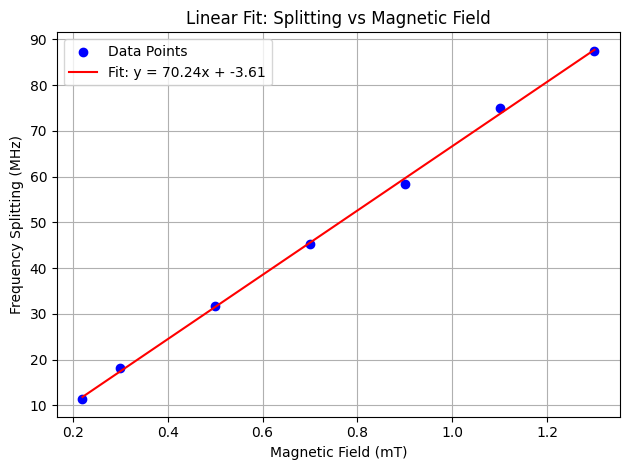

Slope: 70.2364 MHz/T
Intercept: -3.6095 MHz
R²: 0.9991


In [94]:
names = {0.22: '0.22',0.3: '0.30',0.5: '0.50',0.7: '0.7',0.9: '0.90',1.10: '1.10',1.30: '1.30'}
magnetic_fields = [0.22,0.30,0.50,0.7,0.90,1.10 ,1.30]
distance_array = []
for m in magnetic_fields:
    file = f"/Users/adampearl/Documents/191/GitHub/nv-center/Second_draft/code/Splitting/{names[m]}.xlsx"
    top_freqs = freq_peaks(file)
    distance = np.abs(top_freqs[1] - top_freqs[0])
    distance_array.append(distance)
    
# Convert to numpy arrays for fitting
x = np.array(magnetic_fields)
y = np.array(distance_array)

# Linear regression fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
fit_line = slope * x + intercept

# Plotting
plt.scatter(x, y, label="Data Points", color="blue")
plt.plot(x, fit_line, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.xlabel("Magnetic Field (mT)")
plt.ylabel("Frequency Splitting (MHz)")
plt.title("Linear Fit: Splitting vs Magnetic Field")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally print fit details
print(f"Slope: {slope:.4f} MHz/T")
print(f"Intercept: {intercept:.4f} MHz")
print(f"R²: {r_value**2:.4f}")